In [1]:
using Plots, IntervalArithmetic, Interact, ForwardDiff, LaTeXStrings
gr()

Plots.GRBackend()


# Standard Newton method for finding root of function 

The standard **Newton method** for roots of $f: \mathbb{R} \to \mathbb{R}$ is as follows:

> From an initial guess $x_0$, take the tangent line through $(x_0, f(x_0))$ with slope $f'(x_0)$ and intersect it with the $x$-axis to get a new guess $x_1$. Iterate.

The line through $(x_0, y_0)$ with slope $m$ is 

$$ y - y_0 = m \cdot (x - x_0)$$

This intersects the $x$-axis at

$$x_1 := x_0 - \frac{y_0}{m}$$

In [5]:
straight(x0, y0, x, m) = y0 + m * (x - x0)

straight (generic function with 1 method)

In [6]:
function standard_Newton(f, xx, x00, ymin=-10, ymax=10)
    
    f′ = x->ForwardDiff.derivative(f,x)

    @manipulate for n in slider(0:10, value=0)
        x0 = x00
    
        p = plot(f, xx, lw=3, ylim=(ymin, ymax), legend=:false)
        
        scatter!([x0], [0], c="green", ann=(x0, -5, "x0", 10))

        hline!([0.0], c="magenta", lw=3, ls=:dash)


        for i in 1:n
            
            plot!([x0, x0], [0, f(x0)], c="blue", ls=:dash)
            scatter!([x0], [f(x0)], c="red")
            m = f′(x0)

            plot!(xx, [straight(x0, f(x0), x, m) for x in xx], c="gray", alpha=0.5)

            x1 = x0 - f(x0) / m
            #scatter!([x1], [0], c="green", ann=(x1, -5, "x$i"))

            if i < n
                scatter!([x1, x1], [0, f(x1)], c="green")
            end

            x0 = x1
        end
        
        p

    end

end


standard_Newton (generic function with 3 methods)

Interact.Slider{Int64}(5: "input-2" = 0 Int64 , "", 0, 0:10, "horizontal", true, "d", true)

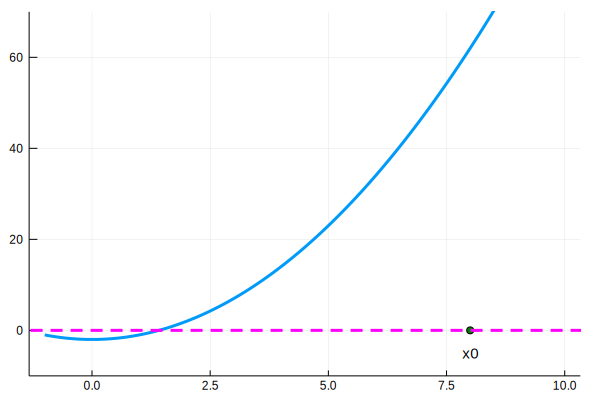

In [7]:
xx = -1:0.01:10
f(x) = x^2 - 2
x0 = 8

standard_Newton(x->f(x), xx, x0, -10, 70)

## Interval Newton

In [11]:
function interval_newton_full(f, X0, ymin=-10, ymax=10)

    @manipulate for n in slider(1:20, value=1), α in linspace(0, 1, 50)


        X = X0

        # draw graph of function over interval X
        xx = X.lo:0.0001:X.hi
        p = plot(xx, map(f, xx), c="blue", lw=3, xlim=(X.lo, X.hi), ylim=(ymin, ymax), legend=:false)
        hline!([0], color="magenta", lw=3, linestyle=:dash)

        Xs = [X]
        new_Xs = []

        N1 = ∅
        N2 = ∅

        for i in 1:n-1

            for X in Xs

                x0 = (1-α)*X.lo + α*X.hi # mid(X)
                deriv = ForwardDiff.derivative(f, X)

                if 0 ∈ deriv 
                    N1 = x0 - f(@interval(x0)) / @interval(deriv.lo, -0.0)
                    N2 = x0 - f(@interval(x0)) / @interval(0.0, deriv.hi)

                    N1 = N1 ∩ X
                    N2 = N2 ∩ X

                    if !(isempty(N1))
                        push!(new_Xs, N1)
                    end

                    if !(isempty(N2))
                        push!(new_Xs, N2)
                    end


                else
                    N1 = x0 - f(@interval(x0)) / deriv
                    N1 = N1 ∩ X

                    if !(isempty(N1))
                        push!(new_Xs, N1)
                    end

                end

            end

            Xs = new_Xs
            new_Xs = []

        end

        for X in Xs
            #if n > 1

                plot!([X.lo, X.hi], [0,0], c="cyan", linewidth=4, alpha=0.3)

                m = (1-α)*X.lo + α*X.hi
                scatter!([m], [0], c="green")
                scatter!([m], [f(m)], c="red")
            plot!([m, m], [0, f(m)], c="green", ls=:dash)
            #end

            x0 = (1-α)*X.lo + α*X.hi # mid(X)
            deriv = ForwardDiff.derivative(f, X)

             # draw initial point
            y0 = f(x0)
            scatter!([x0], [y0], c="red")

            # draw cone
            for m in linspace(deriv.lo, deriv.hi, 100)
                plot!([X.lo, X.hi], [ y0 + m*(x-x0) for x in [X.lo, X.hi]], color="gray", alpha=0.2)
            end

            if 0 ∈ deriv
                N1 = x0 - f(@interval(x0)) / @interval(deriv.lo, -0.0)
                N2 = x0 - f(@interval(x0)) / @interval(0.0, deriv.hi)

                N1 = N1 ∩ X
                N2 = N2 ∩ X
                
                plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=4, alpha=0.8)
                plot!([N2.lo, N2.hi], [0,0], c="red", linewidth=4, alpha=0.8)

            else
                N1 = x0 - f(@interval(x0)) / deriv
                N1 = N1 ∩ X

                plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=4, alpha=0.8)
            end
        end

        #text(0, 5, "$(length(Xs))")

        p

    end


    
end

interval_newton_full (generic function with 3 methods)

Interact.Slider{Int64}(13: "input-4" = 1 Int64 , "", 1, 1:20, "horizontal", true, "d", true)

Interact.Options{:SelectionSlider,Float64}(15: "input-5" = 0.4897959183673469 Float64 , "α", 0.4897959183673469, "0.4897959183673469", 25, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.02040816326530612"=>0.0204082,"0.04081632653061224"=>0.0408163,"0.061224489795918366"=>0.0612245,"0.08163265306122448"=>0.0816327,"0.10204081632653061"=>0.102041,"0.12244897959183673"=>0.122449,"0.14285714285714285"=>0.142857,"0.16326530612244897"=>0.163265,"0.1836734693877551"=>0.183673…), Dict(0.122449=>"0.12244897959183673",0.795918=>"0.7959183673469388",0.591837=>"0.5918367346938775",0.693878=>"0.6938775510204082",0.959184=>"0.9591836734693877",0.55102=>"0.5510204081632653",0.387755=>"0.3877551020408163",0.367347=>"0.3673469387755102",0.612245=>"0.6122448979591837",0.44898=>"0.4489795918367347"…)), Any[], Any[], true, "horizontal", true)

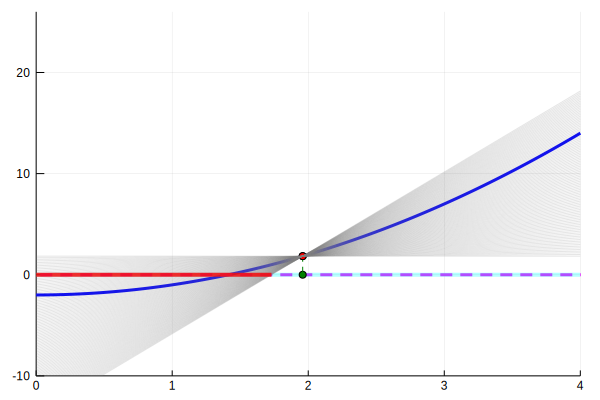

In [12]:
xx = -1:0.01:10
f(x) = x^2 - 2
x0 = 8

interval_newton_full(x->f(x), 0..4, -10, 26)

In [11]:
interval_newton_full(x->sin(1/x), @interval(0.01, 0.1), -1,1 )

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.025 
 
 
 0.050 
 
 
 0.075 
 
 
 0.100 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 39.4926,290.911 40.111,384.716 40.7294,309.713 41.3478,137.783 41.9662,14.5442 42.5846,35.1423 43.203,176.972 43.8214,329.75 44.4399,384.274 45.0583,307.745 
 45.6767,157.139 46.2951,32.5019 46.9135,9.84418 47.5319,97.9754 48.1503,240.708 48.7687,355.577 49.3871,381.634 50.0056,309.294 50.624,179.744 51.2424,59.1989 
 51.8608,4.5636 52.4792,38.0314 53.0976,140.735 53.716,265.213 54.3344,358.376 54.9529,383.788 55.5713,334.415 56.1897,232.356 56.8081,117.666 57.4265,32.068 
 58.0449,4.13803 58.6633,40.8626 59.2817,127.449 59.9001,234.205 60.5186,327.249 61.137,379.186 61.7554,376.555 62.3738,322.347 62.9922,233.624 63.6106,135.57 
 64.229,54.1128 64.8474,9.22441 65.4659,10.5026 66.0843,55.8032 66.7027,132.819 67.3211,222.823 67.9395,305.428 68.5579,363.162 69.1763,384.9 69.7947,367.597 
 70.4131,316.182 71.0316,241.894 71.65,159.594 72.2684,84.6901 72.8868,30.3064 73.5052,5.16233 74.1236,12.4505 74.742,49.7701 75.3604,109.991 75.9788,182.787 
 76.5973,256.511 77.2157,320.07 77.8341,364.524 78.4525,384.204 79.0709,377.243 79.6893,345.526 80.3077,294.134 80.9261,230.42 81.5446,162.881 82.163,100.006 
 82.7814,49.2365 83.3998,16.1537 84.0182,3.97538 84.6366,13.3695 85.255,42.5772 85.8734,87.7913 86.4918,143.719 87.1103,204.25 87.7287,263.138 88.3471,314.641 
 88.9655,354.038 89.5839,378.012 90.2023,384.849 90.8207,374.483 91.4391,348.375 92.0575,309.278 92.676,260.907 93.2944,207.553 93.9128,153.691 94.5312,103.609 
 95.1496,61.0758 95.768,29.094 96.3864,9.7214 97.0048,3.98655 97.6233,11.8857 98.2417,32.4546 98.8601,63.9022 99.4785,103.79 100.097,149.24 100.715,197.155 
 101.334,244.429 101.952,288.15 102.571,325.763 103.189,355.202 103.807,374.984 104.426,384.251 105.044,382.784 105.663,370.97 106.281,349.742 106.899,320.491 
 107.518,284.968 108.136,245.162 108.755,203.19 109.373,161.176 109.991,121.15 110.61,84.956 111.228,54.1728 111.847,30.0594 112.465,13.5163 113.084,5.06774 
 113.702,4.86134 114.32,12.6852 114.939,27.9989 115.557,49.9764 116.176,77.5569 116.794,109.503 117.412,144.459 118.031,181.012 118.649,217.751 119.268,253.317 
 119.886,286.453 120.504,316.04 121.123,341.136 121.741,360.991 122.36,375.067 122.978,383.043 123.597,384.81 124.215,380.467 124.833,370.305 125.452,354.782 
 126.07,334.506 126.689,310.202 127.307,282.689 127.925,252.843 128.544,221.576 129.162,189.801 129.781,158.41 130.399,128.248 131.017,100.095 131.636,74.6455 
 132.254,52.4948 132.873,34.1311 133.491,19.9265 134.11,10.1351 134.728,4.892 135.346,4.21699 135.965,8.01998 136.583,16.1091 137.202,28.2004 137.82,43.9298 
 138.438,62.8651 139.057,84.5195 139.675,108.366 140.294,133.848 140.912,160.399 141.53,187.447 142.149,214.435 142.767,240.825 143.386,266.111 144.004,289.829 
 144.623,311.56 145.241,330.939 145.859,347.659 146.478,361.473 147.096,372.195 147.715,379.701 148.333,383.931 148.951,384.881 149.57,382.606 150.188,377.212 
 150.807,368.855 151.425,357.734 152.043,344.085 152.662,328.176 153.28,310.305 153.899,290.785 154.517,269.948 155.136,248.133 155.754,225.68 156.372,202.93 
 156.991,180.215 157.609,157.856 158.228,136.157 158.846,115.404 159.464,95.859 160.083,77.7594 160.701,61.3155 161.32,46.7085 161.938,34.0894 162.556,23.5788 
 163.175,15.2666 163.793,9.21183 164.412,5.4439 165.03,3.96318 165.649,4.74242 166.267,7.72833 166.885,12.8434 167.504,19.9878 168.122,29.0419 168.741,39.8679 
 169.359,52.3129 169.977,66.2108 170.596,81.3852 171.214,97.6512 171.833,114.818 172.451,132.693 173.069,151.079 173.688,169.783 174.306,188.613 174.925,207.382 
 175.543,225.91 176.162,244.024 176.78,261.56 177.398,278.366 178.017,294.301 178.635,309.235 179.254,323.053 179.872,335.652 180.49,346.945 181.109,356.856 
 

In [12]:
interval_newton_full(x->x^5 - x^4 +2x^2 - x, @interval(-1.5, 1.5), -4,4 )

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 -4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 21.7148,511.461 21.7339,511.309 21.7531,511.158 21.7722,511.006 21.7914,510.855 21.8105,510.704 21.8297,510.552 21.8488,510.401 21.8679,510.25 21.8871,510.099 
 21.9062,509.948 21.9254,509.797 21.9445,509.646 21.9637,509.495 21.9828,509.344 22.002,509.193 22.0211,509.042 22.0402,508.891 22.0594,508.74 22.0785,508.59 
 22.0977,508.439 22.1168,508.288 22.136,508.138 22.1551,507.987 22.1743,507.837 22.1934,507.686 22.2126,507.536 22.2317,507.386 22.2508,507.235 22.27,507.085 
 22.2891,506.935 22.3083,506.784 22.3274,506.634 22.3466,506.484 22.3657,506.334 22.3849,506.184 22.404,506.034 22.4231,505.884 22.4423,505.734 22.4614,505.584 
 22.4806,505.435 22.4997,505.285 22.5189,505.135 22.538,504.985 22.5572,504.836 22.5763,504.686 22.5955,504.537 22.6146,504.387 22.6337,504.238 22.6529,504.088 
 22.672,503.939 22.6912,503.789 22.7103,503.64 22.7295,503.491 22.7486,503.342 22.7678,503.192 22.7869,503.043 22.806,502.894 22.8252,502.745 22.8443,502.596 
 22.8635,502.447 22.8826,502.298 22.9018,502.149 22.9209,502.001 22.9401,501.852 22.9592,501.703 22.9784,501.554 22.9975,501.406 23.0166,501.257 23.0358,501.108 
 23.0549,500.96 23.0741,500.811 23.0932,500.663 23.1124,500.515 23.1315,500.366 23.1507,500.218 23.1698,500.07 23.1889,499.921 23.2081,499.773 23.2272,499.625 
 23.2464,499.477 23.2655,499.329 23.2847,499.181 23.3038,499.033 23.323,498.885 23.3421,498.737 23.3613,498.589 23.3804,498.441 23.3995,498.294 23.4187,498.146 
 23.4378,497.998 23.457,497.85 23.4761,497.703 23.4953,497.555 23.5144,497.408 23.5336,497.26 23.5527,497.113 23.5718,496.966 23.591,496.818 23.6101,496.671 
 23.6293,496.524 23.6484,496.376 23.6676,496.229 23.6867,496.082 23.7059,495.935 23.725,495.788 23.7441,495.641 23.7633,495.494 23.7824,495.347 23.8016,495.2 
 23.8207,495.053 23.8399,494.906 23.859,494.76 23.8782,494.613 23.8973,494.466 23.9165,494.32 23.9356,494.173 23.9547,494.027 23.9739,493.88 23.993,493.734 
 24.0122,493.587 24.0313,493.441 24.0505,493.294 24.0696,493.148 24.0888,493.002 24.1079,492.856 24.127,492.71 24.1462,492.563 24.1653,492.417 24.1845,492.271 
 24.2036,492.125 24.2228,491.979 24.2419,491.833 24.2611,491.688 24.2802,491.542 24.2994,491.396 24.3185,491.25 24.3376,491.104 24.3568,490.959 24.3759,490.813 
 24.3951,490.668 24.4142,490.522 24.4334,490.377 24.4525,490.231 24.4717,490.086 24.4908,489.94 24.5099,489.795 24.5291,489.65 24.5482,489.504 24.5674,489.359 
 24.5865,489.214 24.6057,489.069 24.6248,488.924 24.644,488.779 24.6631,488.634 24.6823,488.489 24.7014,488.344 24.7205,488.199 24.7397,488.054 24.7588,487.91 
 24.778,487.765 24.7971,487.62 24.8163,487.475 24.8354,487.331 24.8546,487.186 24.8737,487.042 24.8928,486.897 24.912,486.753 24.9311,486.608 24.9503,486.464 
 24.9694,486.32 24.9886,486.175 25.0077,486.031 25.0269,485.887 25.046,485.743 25.0652,485.599 25.0843,485.455 25.1034,485.311 25.1226,485.167 25.1417,485.023 
 25.1609,484.879 25.18,484.735 25.1992,484.591 25.2183,484.447 25.2375,484.304 25.2566,484.16 25.2757,484.016 25.2949,483.873 25.314,483.729 25.3332,483.585 
 25.3523,483.442 25.3715,483.299 25.3906,483.155 25.4098,483.012 25.4289,482.868 25.448,482.725 25.4672,482.582 25.4863,482.439 25.5055,482.296 25.5246,482.152 
 25.5438,482.009 25.5629,481.866 25.5821,481.723 25.6012,481.58 25.6204,481.438 25.6395,481.295 25.6586,481.152 25.6778,481.009 25.6969,480.866 25.7161,480.724 
 25.7352,480.581 25.7544,480.438 25.7735,480.296 25.7927,480.153 25.8118,480.011 25.8309,479.868 25.8501,479.726 25.8692,479.583 25.8884,479.441 25.9075,479.299 
 25.9267,479.157 25.9458,479.014 25.965,478.872 25.9841,478.73 26.0033,478.588 26.0224,478.446 26.0415,478.304 26.0607,478.16

In [10]:
interval_newton_full(x->1/(x-1)-2, -5..5)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,235.721 30.6093,235.721 30.615,235.721 30.6206,235.721 30.6263,235.721 30.6319,235.721 30.6376,235.721 30.6433,235.721 30.6489,235.721 30.6546,235.722 
 30.6602,235.722 30.6659,235.722 30.6715,235.722 30.6772,235.722 30.6828,235.722 30.6885,235.722 30.6941,235.722 30.6998,235.722 30.7055,235.722 30.7111,235.722 
 30.7168,235.722 30.7224,235.722 30.7281,235.722 30.7337,235.722 30.7394,235.722 30.745,235.722 30.7507,235.722 30.7563,235.722 30.762,235.723 30.7677,235.723 
 30.7733,235.723 30.779,235.723 30.7846,235.723 30.7903,235.723 30.7959,235.723 30.8016,235.723 30.8072,235.723 30.8129,235.723 30.8185,235.723 30.8242,235.723 
 30.8299,235.723 30.8355,235.723 30.8412,235.723 30.8468,235.723 30.8525,235.723 30.8581,235.723 30.8638,235.723 30.8694,235.724 30.8751,235.724 30.8807,235.724 
 30.8864,235.724 30.8921,235.724 30.8977,235.724 30.9034,235.724 30.909,235.724 30.9147,235.724 30.9203,235.724 30.926,235.724 30.9316,235.724 30.9373,235.724 
 30.943,235.724 30.9486,235.724 30.9543,235.724 30.9599,235.724 30.9656,235.724 30.9712,235.724 30.9769,235.725 30.9825,235.725 30.9882,235.725 30.9938,235.725 
 30.9995,235.725 31.0052,235.725 31.0108,235.725 31.0165,235.725 31.0221,235.725 31.0278,235.725 31.0334,235.725 31.0391,235.725 31.0447,235.725 31.0504,235.725 
 31.056,235.725 31.0617,235.725 31.0674,235.725 31.073,235.725 31.0787,235.726 31.0843,235.726 31.09,235.726 31.0956,235.726 31.1013,235.726 31.1069,235.726 
 31.1126,235.726 31.1182,235.726 31.1239,235.726 31.1296,235.726 31.1352,235.726 31.1409,235.726 31.1465,235.726 31.1522,235.726 31.1578,235.726 31.1635,235.726 
 31.1691,235.726 31.1748,235.726 31.1804,235.726 31.1861,235.727 31.1918,235.727 31.1974,235.727 31.2031,235.727 31.2087,235.727 31.2144,235.727 31.22,235.727 
 31.2257,235.727 31.2313,235.727 31.237,235.727 31.2426,235.727 31.2483,235.727 31.254,235.727 31.2596,235.727 31.2653,235.727 31.2709,235.727 31.2766,235.727 
 31.2822,235.727 31.2879,235.727 31.2935,235.728 31.2992,235.728 31.3048,235.728 31.3105,235.728 31.3162,235.728 31.3218,235.728 31.3275,235.728 31.3331,235.728 
 31.3388,235.728 31.3444,235.728 31.3501,235.728 31.3557,235.728 31.3614,235.728 31.367,235.728 31.3727,235.728 31.3784,235.728 31.384,235.728 31.3897,235.728 
 31.3953,235.728 31.401,235.729 31.4066,235.729 31.4123,235.729 31.4179,235.729 31.4236,235.729 31.4292,235.729 31.4349,235.729 31.4406,235.729 31.4462,235.729 
 31.4519,235.729 31.4575,235.729 31.4632,235.729 31.4688,235.729 31.4745,235.729 31.4801,235.729 31.4858,235.729 31.4914,235.729 31.4971,235.729 31.5028,235.729 
 31.5084,235.73 31.5141,235.73 31.5197,235.73 31.5254,235.73 31.531,235.73 31.5367,235.73 31.5423,235.73 31.548,235.73 31.5536,235.73 31.5593,235.73 
 31.565,235.73 31.5706,235.73 31.5763,235.73 31.5819,235.73 31.5876,235.73 31.5932,235.73 31.5989,235.73 31.6045,235.73 31.6102,235.731 31.6158,235.731 
 31.6215,235.731 31.6272,235.731 31.6328,235.731 31.6385,235.731 31.6441,235.731 31.6498,235.731 31.6554,235.731 31.6611,235.731 31.6667,235.731 31.6724,235.731 
 31.678,235.731 31.6837,235.731 31.6894,235.731 31.695,235.731 31.7007,235.731 31.7063,235.731 31.712,235.731 31.7176,235.732 31.7233,235.732 31.7289,235.732 
 31.7346,235.732 31.7402,235.732 31.7459,235.732 31.7516,235.732 31.7572,235.732 31.7629,235.732 31.7685,235.732 31.7742,235.732 31.7798,235.732 31.7855,235.732 
 31.7911,235.732 31.7968,235.732 31.8024,235.732 31.8081,235.732 31.8138,235.732 31.8194,235.732 31.8251,235.733 31.8307,235.733 31.8364,235.733 31.842,235.733 
 31.8477,235.733 31.8533,235.733 31.859,235.733 31.8646,235.733 31.8703,235.733 31.876,235.733 31.8816,235.733 31.8873,235.733 31.8929,235.733 31.8986